# Analyse how $\theta_{BAO}$ is affected by shifts in parameters in EDE+$M_\nu$ model

In [1]:
#import required modules
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class
from scipy import interpolate
import pickle
import classy 

matplotlib.rcParams['axes.linewidth'] = 10
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['axes.labelsize'] = 75
matplotlib.rcParams['xtick.labelsize'] = 65 
matplotlib.rcParams['ytick.labelsize'] = 65
matplotlib.rcParams['legend.fontsize'] = 150
matplotlib.rcParams['axes.labelpad'] = 100

In [2]:
fn_006 = '../bestfit/mnu_006.bestfit'
fn_009 = '../bestfit/mnu_009.bestfit'
fn_012 = '../bestfit/mnu_012.bestfit'
fn_015 = '../bestfit/mnu_015.bestfit'
fn_018 = '../bestfit/mnu_018.bestfit'
fn_024 = '../bestfit/mnu_024.bestfit'
fn_03 = '../bestfit/mnu_03.bestfit'
fn_lcdm = '../bestfit/LCDM.bestfit'

In [3]:
bfs_dict={}

In [4]:
#save the lcdm data in a dictionary 

with open(fn_lcdm) as f:
    bfs_dict['lcdm'] = {}
    for line in f: 
        if line.split()[0] == '#':
            print(len(line.split()))
            names = [line.split()[k].replace(',', '') for k in range(1,62)]
        else: 
            vals = line.split()
    for j in range(len(vals)):
        bfs_dict['lcdm'][names[j]] = vals[j]


62


In [5]:
fns = [fn_006,fn_009,fn_012,fn_015,fn_018,fn_024,fn_03]
mnus= [6,9,12,15,18,24,30]


In [6]:
i=0
for fn in fns: 
    with open(fn) as f:
        bfs_dict[f'{mnus[i]}'] = {}
        for line in f: 
            if line.split()[0] == '#':
                names = [line.split()[k].replace(',', '') for k in range(1,65)]
            else: 
                vals = line.split()
        for j in range(len(vals)):
            bfs_dict[f'{mnus[i]}'][names[j]] = vals[j]

    i+=1

In [7]:
mnu_006_dict= bfs_dict['6']
mnu_012_dict= bfs_dict['12']
mnu_018_dict= bfs_dict['18']
mnu_024_dict= bfs_dict['24']
mnu_03_dict= bfs_dict['30']
mnu_015_dict= bfs_dict['15']
mnu_009_dict= bfs_dict['9']
lcdm_dict = bfs_dict['lcdm']


In [8]:
#function to determine physical densities from bf files (useful for analysis but not strictly needed)
def get_phys_densities(dict):
    H_0 = float(dict['H0'])
    fac = (H_0/100)**2
    Omega_m = float(dict['Omega_m'])
    Omega_lam = 1-Omega_m
    om = Omega_m * fac 
    ol = Omega_lam*fac
    
    return om, ol 


### Set the parameters for the CLASS instances 

This is a test to see how varying different parameters whilst keeping others fixed (in particular $\theta_s$). To perform this we take as a baseline the bestfit to a model with $M_\nu=0.06eV$ and then perturb around this by inserting the bestfit model parameters of the $M_\nu=0.24eV$ model. 

In [9]:
#BEST FIT PARAMS FROM BF with LCDM model  
LCDM_settings = {'output':'tCl pCl lCl mPk', 
                 '100*theta_s': lcdm_dict['100*theta_s'],
                 'ln10^{10}A_s': lcdm_dict['ln10^{10}A_s'],
                 'n_s': lcdm_dict['n_s'],
                 'omega_b':  float(lcdm_dict['omega_b']),
                 'omega_cdm': lcdm_dict['omega_cdm'],
                 'tau_reio': lcdm_dict['tau_reio'],
                 'l_max_scalars':3508,
                 'non linear':'HMcode',
                 'P_k_max_h/Mpc':30,
                 'Omega_Lambda':0,                      
                 'Omega_fld':0,                         
                 'Omega_scf': -1,                        #scf
                 'scf_parameters':'1, 1, 1, 1, 1, 0.0', #scf
                 'scf_tuning_index':3,                  #scf
                 'attractor_ic_scf':'no',               #scf
                 'n_scf':3,                             #scf
                 'CC_scf':1,                            #scf
                 'f_scf': np.power(10,26.59913),        #scf                              
                 'm_scf': 0,                            #scf: this guarantees fEDE is 0 (otherwise hard to force)
                 'thetai_scf': 2.83,        
                 'z_max_pk':2.}

In [10]:
LCDM = Class()
LCDM.set(LCDM_settings)
LCDM.compute()

In [11]:
EDE_pp_params= {'100*theta_s': mnu_006_dict['100*theta_s'],
         'log10z_c': mnu_006_dict['log10z_c'],
         'thetai_scf': mnu_006_dict['thetai_scf'],
         'ln10^{10}A_s': mnu_006_dict['ln10^{10}A_s'],
         'n_s': mnu_006_dict['n_s'],
         'omega_b':  float(mnu_006_dict['omega_b']),
         'omega_cdm': mnu_006_dict['omega_cdm'],
         'tau_reio': mnu_006_dict['tau_reio'],
         'fEDE': mnu_006_dict['fEDE'],
         'N_ncdm':1,
         'm_ncdm': 0.06,
         'N_ur':2.0328, 
         'Omega_Lambda':0.0, #set to zero as included in potential function! 
         'Omega_fld':0, 
         'Omega_scf':-1, 
         'n_scf':3, #n-value for potential 
         'CC_scf':1, 
         'scf_parameters':'1, 1, 1, 1, 1, 0.0', 
         'scf_tuning_index':3, 
         'attractor_ic_scf':'no', 
         'output':'tCl pCl lCl mPk', 
         'lensing':'yes', 
         'l_max_scalars':3508, 
         'P_k_max_h/Mpc':30,
         'z_max_pk':2.}

EDE_high_mnu_params= {'100*theta_s': mnu_006_dict['100*theta_s'],
         'log10z_c': mnu_006_dict['log10z_c'],
         'thetai_scf': mnu_006_dict['thetai_scf'],
         'ln10^{10}A_s': mnu_006_dict['ln10^{10}A_s'],
         'n_s': mnu_006_dict['n_s'],
         'omega_b':  float(mnu_006_dict['omega_b']),
         'omega_cdm': mnu_006_dict['omega_cdm'],
         'tau_reio': mnu_006_dict['tau_reio'],
         'fEDE': mnu_006_dict['fEDE'],
         'N_ncdm':1,
         'm_ncdm': 0.24,
         'N_ur':2.0328, 
         'Omega_Lambda':0.0, #set to zero as included in potential function! 
         'Omega_fld':0, 
         'Omega_scf':-1, 
         'n_scf':3, #n-value for potential 
         'CC_scf':1, 
         'scf_parameters':'1, 1, 1, 1, 1, 0.0', 
         'scf_tuning_index':3, 
         'attractor_ic_scf':'no', 
         'output':'tCl pCl lCl mPk', 
         'lensing':'yes', 
         'l_max_scalars':3508, 
         'P_k_max_h/Mpc':30,
         'z_max_pk':2.}


EDE_high_cdm_params= {'100*theta_s': mnu_006_dict['100*theta_s'],
         'log10z_c': mnu_006_dict['log10z_c'],
         'thetai_scf': mnu_006_dict['thetai_scf'],
         'ln10^{10}A_s': mnu_006_dict['ln10^{10}A_s'],
         'n_s': mnu_006_dict['n_s'],
         'omega_b':  float(mnu_006_dict['omega_b']),
         'omega_cdm': mnu_024_dict['omega_cdm'],
         'tau_reio': mnu_006_dict['tau_reio'],
         'fEDE': mnu_006_dict['fEDE'],
         'N_ncdm':1,
         'm_ncdm': 0.06,
         'N_ur':2.0328, 
         'Omega_Lambda':0.0, #set to zero as included in potential function! 
         'Omega_fld':0, 
         'Omega_scf':-1, 
         'n_scf':3, #n-value for potential 
         'CC_scf':1, 
         'scf_parameters':'1, 1, 1, 1, 1, 0.0', 
         'scf_tuning_index':3, 
         'attractor_ic_scf':'no', 
         'output':'tCl pCl lCl mPk', 
         'lensing':'yes', 
         'l_max_scalars':3508, 
         'P_k_max_h/Mpc':30,
         'z_max_pk':2.}


EDE_high_fede_params= {'100*theta_s': mnu_006_dict['100*theta_s'],
         'log10z_c': mnu_006_dict['log10z_c'],
         'thetai_scf': mnu_006_dict['thetai_scf'],
         'ln10^{10}A_s': mnu_006_dict['ln10^{10}A_s'],
         'n_s': mnu_006_dict['n_s'],
         'omega_b':  float(mnu_006_dict['omega_b']),
         'omega_cdm': mnu_006_dict['omega_cdm'],
         'tau_reio': mnu_006_dict['tau_reio'],
         'fEDE': mnu_024_dict['fEDE'],
         'N_ncdm':1,
         'm_ncdm': 0.06,
         'N_ur':2.0328, 
         'Omega_Lambda':0.0, #set to zero as included in potential function! 
         'Omega_fld':0, 
         'Omega_scf':-1, 
         'n_scf':3, #n-value for potential 
         'CC_scf':1, 
         'scf_parameters':'1, 1, 1, 1, 1, 0.0', 
         'scf_tuning_index':3, 
         'attractor_ic_scf':'no', 
         'output':'tCl pCl lCl mPk', 
         'lensing':'yes', 
         'l_max_scalars':3508, 
         'P_k_max_h/Mpc':30,
         'z_max_pk':2.}

EDE_simultaneous_params= {'100*theta_s': mnu_006_dict['100*theta_s'],
         'log10z_c': mnu_006_dict['log10z_c'],
         'thetai_scf': mnu_006_dict['thetai_scf'],
         'ln10^{10}A_s': mnu_006_dict['ln10^{10}A_s'],
         'n_s': mnu_006_dict['n_s'],
         'omega_b':  float(mnu_006_dict['omega_b']),
         'omega_cdm': mnu_024_dict['omega_cdm'],
         'tau_reio': mnu_006_dict['tau_reio'],
         'fEDE': mnu_024_dict['fEDE'],
         'N_ncdm':1,
         'm_ncdm': 0.24,
         'N_ur':2.0328, 
         'Omega_Lambda':0.0, #set to zero as included in potential function! 
         'Omega_fld':0, 
         'Omega_scf':-1, 
         'n_scf':3, #n-value for potential 
         'CC_scf':1, 
         'scf_parameters':'1, 1, 1, 1, 1, 0.0', 
         'scf_tuning_index':3, 
         'attractor_ic_scf':'no', 
         'output':'tCl pCl lCl mPk', 
         'lensing':'yes', 
         'l_max_scalars':3508, 
         'P_k_max_h/Mpc':30,
         'z_max_pk':2.}

In [12]:
EDE_pp = Class()
EDE_pp.set(EDE_pp_params)
EDE_pp.compute()

In [13]:
EDE_high_mnu = Class()
EDE_high_mnu.set(EDE_high_mnu_params)
EDE_high_mnu.compute()

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


In [14]:
EDE_high_cdm = Class()
EDE_high_cdm.set(EDE_high_cdm_params)
EDE_high_cdm.compute()

In [15]:
EDE_high_fede = Class()
EDE_high_fede.set(EDE_high_fede_params)
EDE_high_fede.compute()

In [16]:
EDE_simultaneous = Class()
EDE_simultaneous.set(EDE_simultaneous_params)
EDE_simultaneous.compute()

In [17]:
rs_lcdm = LCDM.rs_drag()
rs_ede_pp = EDE_pp.rs_drag()
rs_EDE_high_mnu = EDE_high_mnu.rs_drag()
rs_EDE_high_cdm = EDE_high_cdm.rs_drag()
rs_EDE_high_fede = EDE_high_fede.rs_drag()
rs_EDE_simultaneous = EDE_simultaneous.rs_drag()

In [18]:
# #Get background quantities and recover their names:
baEDE_pp = EDE_pp.get_background()
baLCDM = LCDM.get_background()
baEDE_high_mnu = EDE_high_mnu.get_background()
baEDE_high_cdm = EDE_high_cdm.get_background()
baEDE_high_fede = EDE_high_fede.get_background()
baEDE_simultaneous = EDE_simultaneous.get_background()


EDE_pp_ang = baEDE_pp['ang.diam.dist.']
LCDM_ang = baLCDM['ang.diam.dist.']
EDE_high_mnu_ang = baEDE_high_mnu['ang.diam.dist.']
EDE_high_cdm_ang = baEDE_high_cdm['ang.diam.dist.']
EDE_high_fede_ang = baEDE_high_fede['ang.diam.dist.']
EDE_simultaneous_ang = baEDE_simultaneous['ang.diam.dist.']


z_lcdm = baLCDM['z']
z_ede_pp = baEDE_pp['z']
z_ede_high_mnu = baEDE_high_mnu['z']
z_ede_high_cdm = baEDE_high_cdm['z']
z_ede_high_fede = baEDE_high_fede['z']
z_ede_simultaneous = baEDE_simultaneous['z']

#Form the spherically averaged D_v  
#Made unitless as we look at ratios anyway 
LCDM_dv = ((((np.ones_like(z_lcdm)+z_lcdm)*LCDM_ang)**2)*z_lcdm/baLCDM['H [1/Mpc]'])**(1/3) 
EDE_pp_dv =((((np.ones_like(z_lcdm)+z_ede_pp)*EDE_pp_ang)**2)*z_ede_pp/baEDE_pp['H [1/Mpc]'])**(1/3)
EDE_high_mnu_dv =((((np.ones_like(z_lcdm)+z_ede_high_mnu)*EDE_high_mnu_ang)**2)*z_ede_high_mnu/baEDE_high_mnu['H [1/Mpc]'])**(1/3)
EDE_high_cdm_dv =((((np.ones_like(z_lcdm)+z_ede_high_cdm)*EDE_high_cdm_ang)**2)*z_ede_high_cdm/baEDE_high_cdm['H [1/Mpc]'])**(1/3)
EDE_high_fede_dv =((((np.ones_like(z_lcdm)+z_ede_high_fede)*EDE_high_fede_ang)**2)*z_ede_high_fede/baEDE_high_fede['H [1/Mpc]'])**(1/3)
EDE_simultaneous_dv =((((np.ones_like(z_lcdm)+z_ede_simultaneous)*EDE_simultaneous_ang)**2)*z_ede_simultaneous/baEDE_simultaneous['H [1/Mpc]'])**(1/3)


EDE_pp_ratios = EDE_pp_dv/rs_ede_pp
LCDM_ratios = LCDM_dv/rs_lcdm
EDE_high_mnu_ratios = EDE_high_mnu_dv/rs_EDE_high_mnu
EDE_high_cdm_ratios = EDE_high_cdm_dv/rs_EDE_high_cdm
EDE_high_fede_ratios = EDE_high_fede_dv/rs_EDE_high_fede
EDE_simultaneous_ratios = EDE_simultaneous_dv/rs_EDE_simultaneous

In [19]:
#making an interpolation to match up the z values for different experiments 
EDE_pp_spline = interpolate.InterpolatedUnivariateSpline(np.flip(z_ede_pp),np.flip(EDE_pp_ratios))
EDE_high_mnu_spline = interpolate.InterpolatedUnivariateSpline(np.flip(z_ede_high_mnu),np.flip(EDE_high_mnu_ratios))
EDE_high_cdm_spline = interpolate.InterpolatedUnivariateSpline(np.flip(z_ede_high_cdm),np.flip(EDE_high_cdm_ratios))
EDE_high_fede_spline = interpolate.InterpolatedUnivariateSpline(np.flip(z_ede_high_fede),np.flip(EDE_high_fede_ratios))
EDE_simultaneous_spline = interpolate.InterpolatedUnivariateSpline(np.flip(z_ede_simultaneous),np.flip(EDE_simultaneous_ratios))

In [20]:
EDE_pp_out = EDE_pp_spline(z_lcdm)
EDE_high_mnu_out = EDE_high_mnu_spline(z_lcdm)
EDE_high_cdm_out = EDE_high_cdm_spline(z_lcdm)
EDE_high_fede_out = EDE_high_fede_spline(z_lcdm)
EDE_simultaneous_out = EDE_simultaneous_spline(z_lcdm)

In [21]:
#THE BOSS DATA POINTS: 
rd_fid = 147.78 #MPc (fiducial r_d value used in paper)

boss_zs = [0.38,0.51,0.61] #the average redshifts at which the BOSS data is collected 

boss_vals = np.array([1477,1877,2140]) #The average values of D_v * rd_fid/r_d from the BOSS data section 8.2 eqts 21-23 in https://arxiv.org/pdf/1607.03155.pdf

boss_vals = boss_vals/rd_fid

z_038 = np.where((z_lcdm<=0.38) & (z_lcdm>=0.379))[0][0]

z_051 = np.where((z_lcdm<=0.51) & (z_lcdm>=0.509))[0][0]

z_061 = np.where((z_lcdm<=0.61) & (z_lcdm>=0.609))[0][0]

lcdm_reference_vals = np.array([LCDM_ratios[z_038], LCDM_ratios[z_051], LCDM_ratios[z_061]])
boss_ratios = boss_vals/lcdm_reference_vals


### Plot the different $\theta_{BAO}$ curves

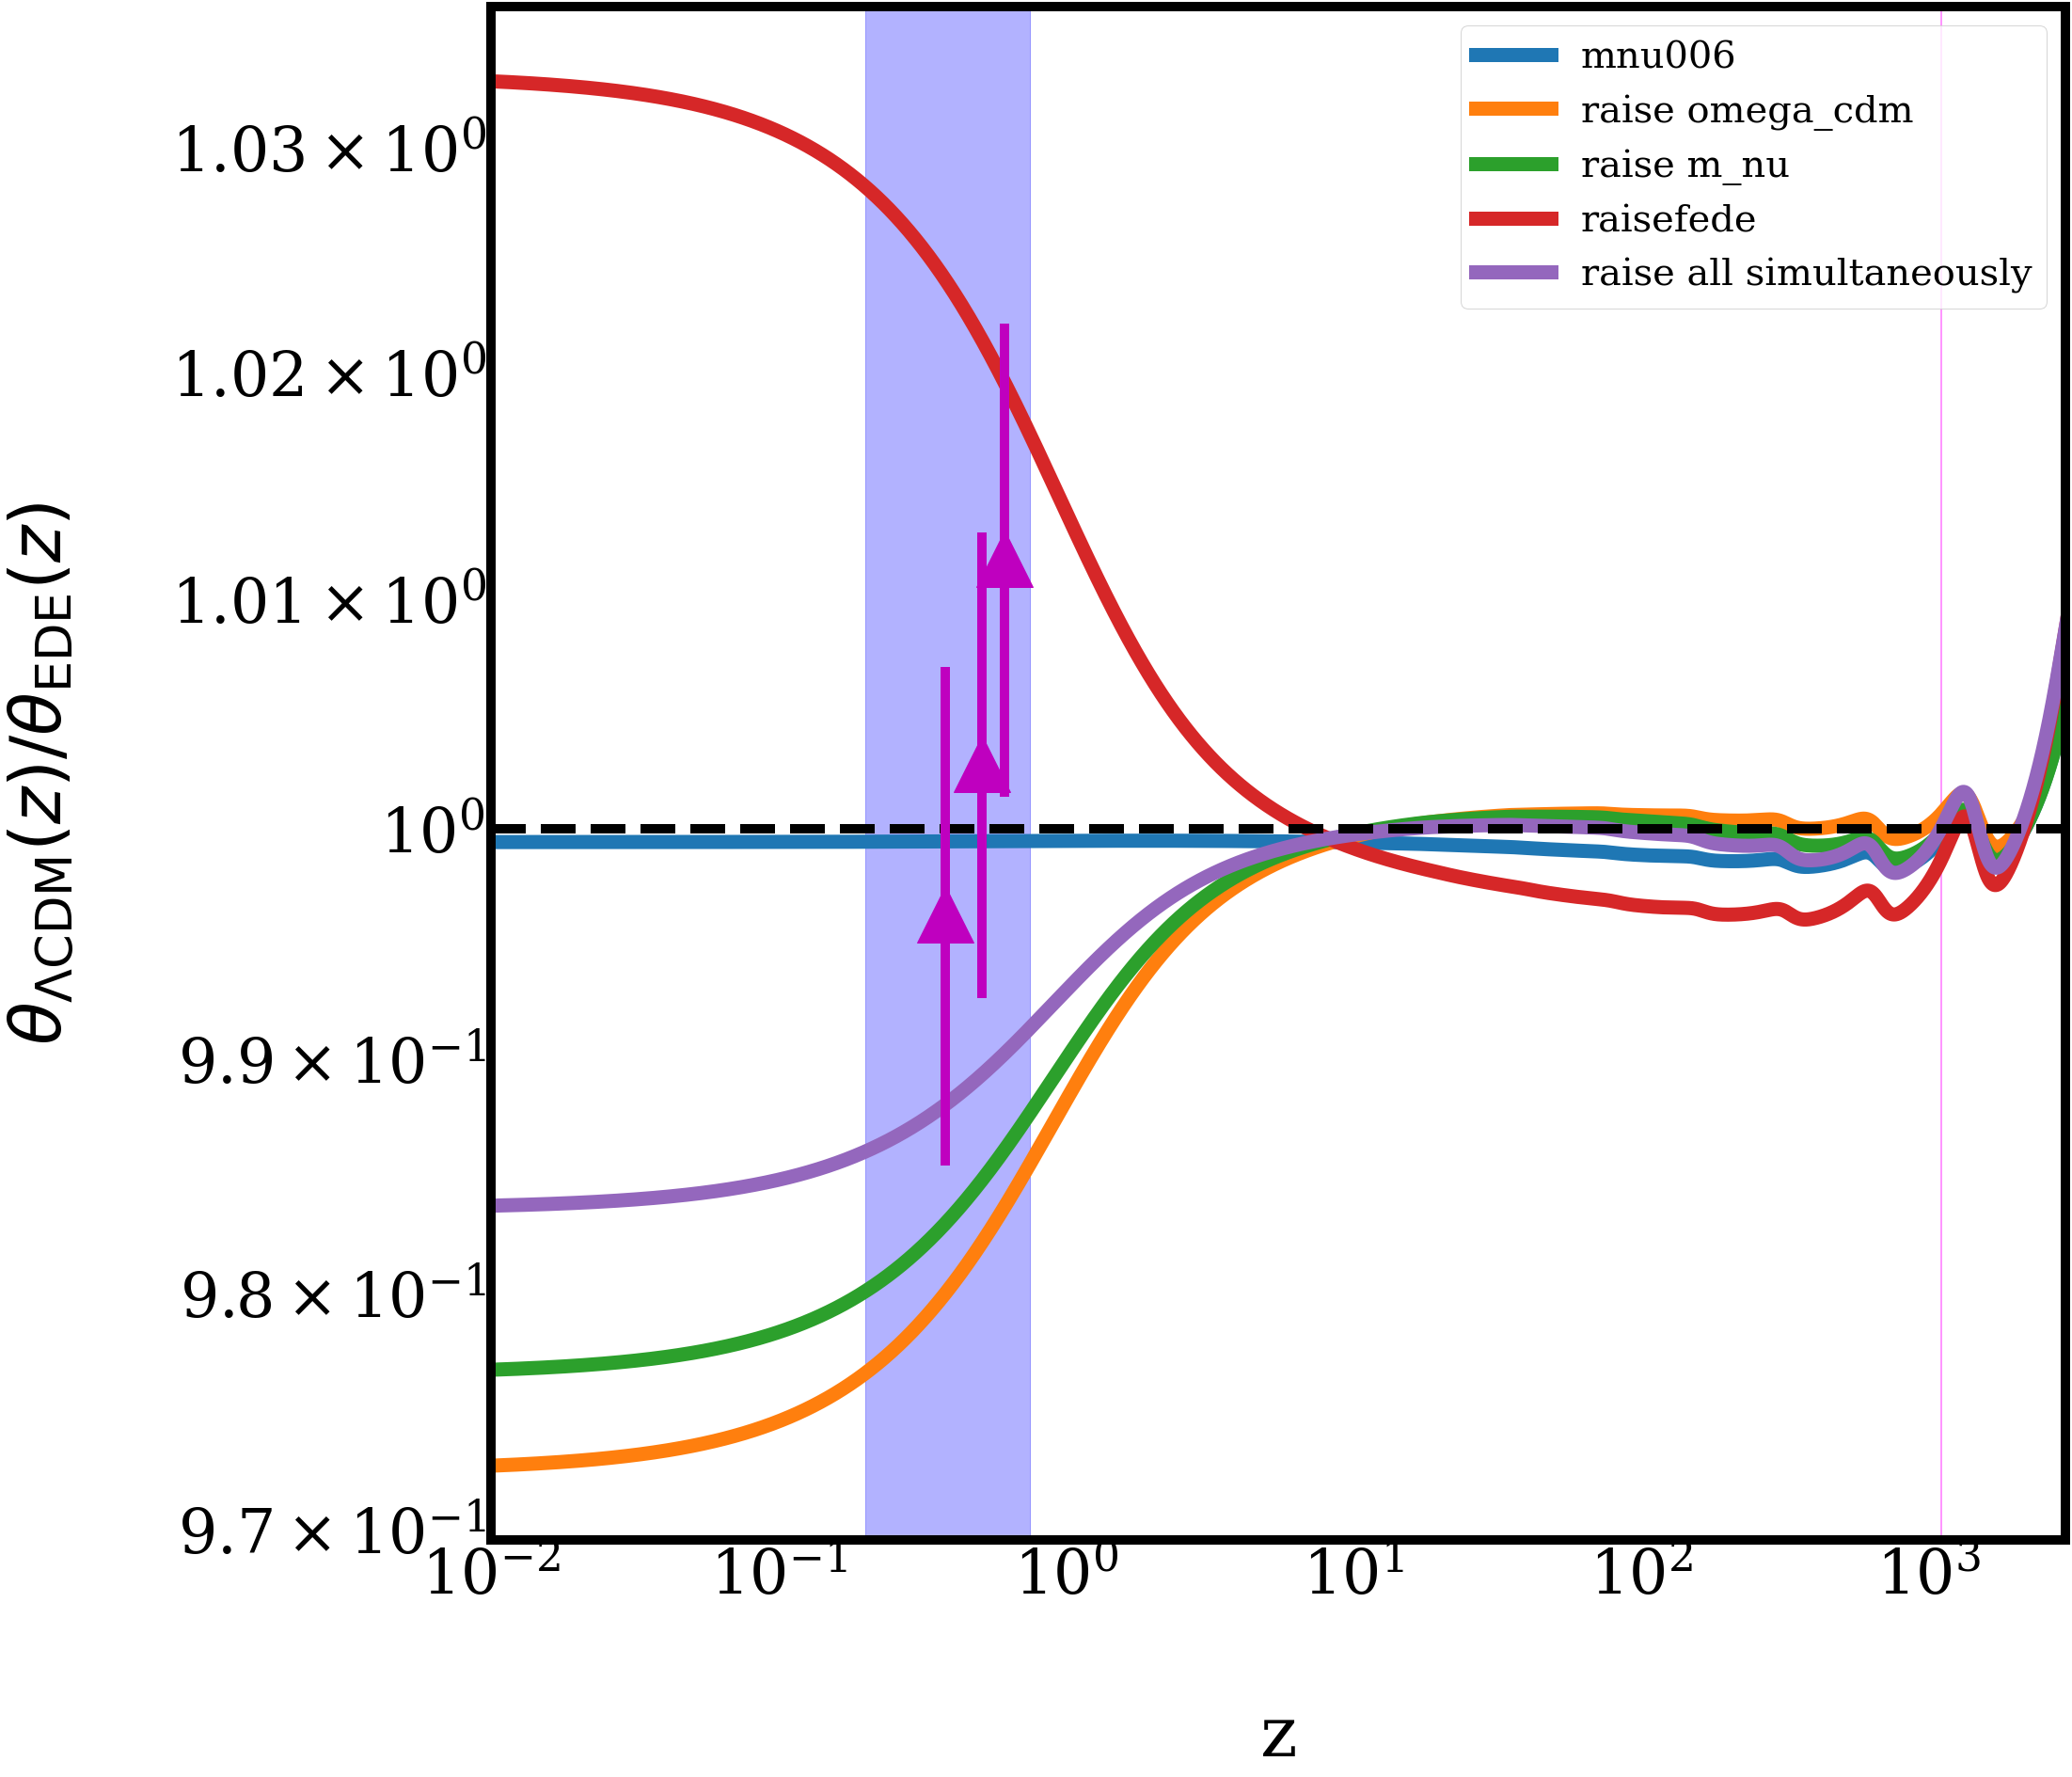

In [22]:
fig, ax = plt.subplots(figsize=(30,30))

matplotlib.rcParams['legend.fontsize'] = 40

# ax.loglog(z_lcdm, EDE_pp_out*rs_lcdm/(LCDM_dv), label='mnu006')
# ax.loglog(z_lcdm, EDE_high_cdm_out*rs_lcdm/(LCDM_dv),label='raise omega_cdm')
# ax.loglog(z_lcdm, EDE_high_mnu_out*rs_lcdm/(LCDM_dv),label='raise m_nu')
# ax.loglog(z_lcdm, EDE_high_fede_out*rs_lcdm/(LCDM_dv),label='raisefede')
# ax.loglog(z_lcdm, EDE_simultaneous_out*rs_lcdm/(LCDM_dv),label='raise all simultaneously')

ax.loglog(z_lcdm, (LCDM_dv)/(EDE_pp_out*rs_lcdm), lw=15, label='mnu006')
ax.loglog(z_lcdm, (LCDM_dv)/(EDE_high_cdm_out*rs_lcdm),lw=15, label='raise omega_cdm')
ax.loglog(z_lcdm, (LCDM_dv)/(EDE_high_mnu_out*rs_lcdm),lw=15, label='raise m_nu')
ax.loglog(z_lcdm, (LCDM_dv)/(EDE_high_fede_out*rs_lcdm),lw=15, label='raisefede')
ax.loglog(z_lcdm, (LCDM_dv)/(EDE_simultaneous_out*rs_lcdm),lw=15, label='raise all simultaneously')

ax.axhline(1,c='k',lw=10,ls='--')
boss_fractional_err = np.array([(16/rd_fid),(19/rd_fid),(22/rd_fid)])/boss_vals #from the error in the alam paper: https://arxiv.org/pdf/1607.03155.pdf eqts 21-23 in sect. 8.2 consensus BAO + fs results
boss_err = boss_fractional_err * boss_vals**(-1) * lcdm_reference_vals #assume the fractional error in the value of theta is the same as in the value of 1/theta

ax.errorbar(boss_zs, (boss_ratios)**(-1), yerr=boss_err, fmt='^', color='m', markersize=60, capthick=40,lw=10)
ax.set_xlabel(r'$z$')
ax.set_ylabel(r'$\theta_{\rm EDE}(z)/\theta_{\Lambda{\rm CDM}}(z)$')

ax.axvspan(0.2, 0.75, alpha=0.3, color='blue')
ax.set_xlim(1e-2, 3e3)
ax.axvspan(1100, 1110, alpha=0.3, color='magenta')
ax.legend(loc='best')

ax.set_xlabel('z')
ax.set_ylabel(r'$\theta_{\Lambda{\rm CDM}}(z)/\theta_{\rm EDE}(z)$')

fig.savefig('parameter_effect_on_bao.pdf', bbox_inches='tight')

### Take-away 

This shows how the value of $\theta_{BAO}$ changes under changes of different parameters. This shows how increasing $f_{EDE}$ can help to bring $\theta_{BAO}$ closer to data.